In [1]:
import numpy as np
import pandas as pd
import warnings
import os
from datasets import load_dataset
from lambeq import BobcatParser
warnings.filterwarnings("ignore")
os.environ["TOKENIZERS_PARALLELISM"] = "false"

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/ext3/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-20 12:40:23.832383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1) Read in the data and create diagrams

### Skip below cell

In [2]:
### Still working on getting this cell to work. Bobcatarser cannot parse some sentences due to complexity
# def read_sst2(data_type="train"):
#     dataset = load_dataset("gpt3mix/sst2")

#     data = dataset[data_type]

#     usr_data = []
#     usr_labels = []

#     for example in data:
#         usr_data.append(example["text"])
#         usr_labels.append(example["label"])

#     print("First sentence:", usr_data[0])
#     print("First label:", usr_labels[0])

#     return usr_data,usr_labels

# train_data,train_labels = read_sst2("train")
# dev_data,dev_labels = read_sst2("validation")
# test_data,test_labels = read_sst2("test")

In [2]:
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, train_data = read_data('datasets/mc_train_data.txt')
dev_labels, dev_data = read_data('datasets/mc_dev_data.txt')
test_labels, test_data = read_data('datasets/mc_test_data.txt')

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


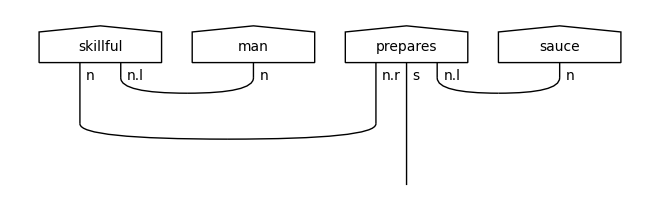

In [4]:
parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

raw_train_diagrams[0].draw()

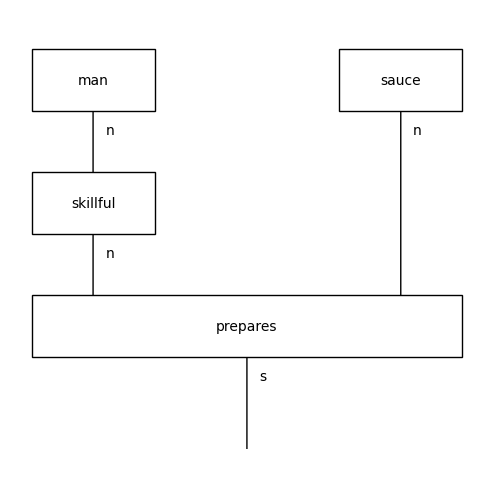

In [10]:
from lambeq import Rewriter
def diagram_rewriting(diagrams): #(data):
    #diagrams = parser.sentences2diagrams(data)
    rewriter = Rewriter(['prepositional_phrase', 'determiner'])
    rewritten_diagrams = [rewriter(diagram) for diagram in diagrams] 
    normalised_diagrams = [diagram.normal_form() for diagram in rewritten_diagrams]
    curry_functor = Rewriter(['curry'])
    curried_diagrams =[curry_functor(diagram) for diagram in normalised_diagrams] 
    normalised_diagrams2 = [diagram.normal_form() for diagram in curried_diagrams]
    return normalised_diagrams2
diagram_rewriting(raw_train_diagrams)[0].draw()

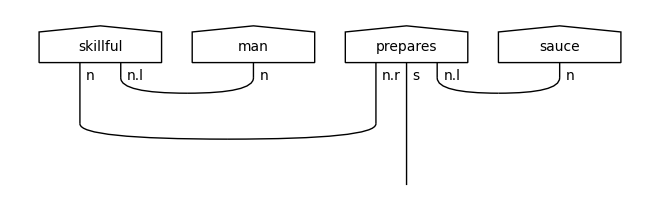

In [23]:
def re(diagrams):
    rewriter = Rewriter(['prepositional_phrase', 'determiner'])
    rewritten_diagrams = [rewriter(diagram) for diagram in diagrams]
    return rewritten_diagrams
re(raw_train_diagrams)[0].draw(path='./re_diagram.png')
re(raw_train_diagrams)[0].draw()

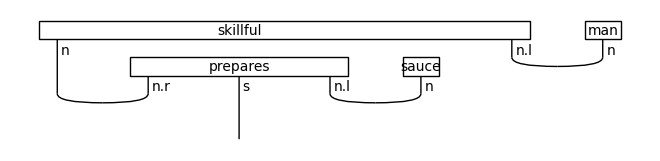

In [24]:
def re_norm(diagrams):
    rewriter = Rewriter(['prepositional_phrase', 'determiner'])
    rewritten_diagrams = [rewriter(diagram) for diagram in diagrams]
    normalised_diagrams = [diagram.normal_form() for diagram in rewritten_diagrams]
    return normalised_diagrams
re_norm(raw_train_diagrams)[0].draw(path='./re_norm_diagram.png')
re_norm(raw_train_diagrams)[0].draw()

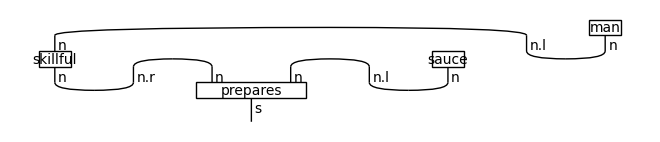

In [25]:
def re_norm_cur(diagrams):
    rewriter = Rewriter(['prepositional_phrase', 'determiner'])
    rewritten_diagrams = [rewriter(diagram) for diagram in diagrams]
    normalised_diagrams = [diagram.normal_form() for diagram in rewritten_diagrams]
    curry_functor = Rewriter(['curry'])
    curried_diagrams = [curry_functor(diagram) for diagram in normalised_diagrams]
    return curried_diagrams

re_norm_cur(raw_train_diagrams)[0].draw(path='./re_norm_cur_diagram.png')
re_norm_cur(raw_train_diagrams)[0].draw()

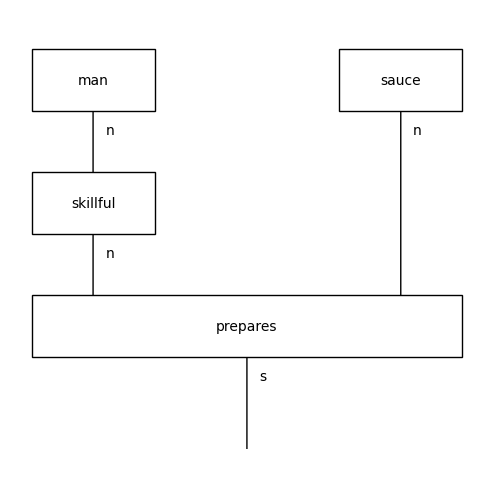

In [26]:
def re_norm_cur_norm(diagrams):
    rewriter = Rewriter(['prepositional_phrase', 'determiner'])
    rewritten_diagrams = [rewriter(diagram) for diagram in diagrams]
    normalised_diagrams = [diagram.normal_form() for diagram in rewritten_diagrams]
    curry_functor = Rewriter(['curry'])
    curried_diagrams = [curry_functor(diagram) for diagram in normalised_diagrams]
    normalised_diagrams2 = [diagram.normal_form() for diagram in curried_diagrams]
    return normalised_diagrams2
re_norm_cur_norm(raw_train_diagrams)[0].draw(path='./re_norm_cur_norm_diagram.png')
re_norm_cur_norm(raw_train_diagrams)[0].draw()

Before rewriting


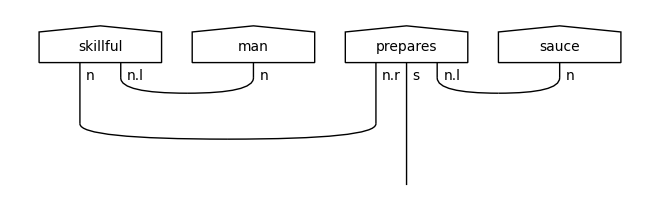

After rewriting


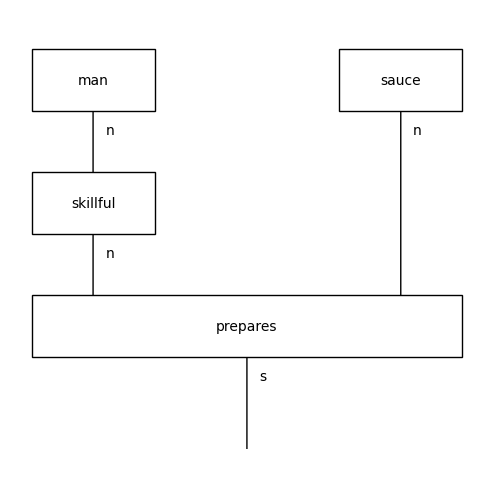

In [6]:
print("Before rewriting")
raw_train_diagrams[0].draw()
train_diagrams = diagram_rewriting(raw_train_diagrams)
dev_diagrams = diagram_rewriting(raw_dev_diagrams)
test_diagrams = diagram_rewriting(raw_test_diagrams)
print("After rewriting")
train_diagrams[0].draw()

Before removing cups


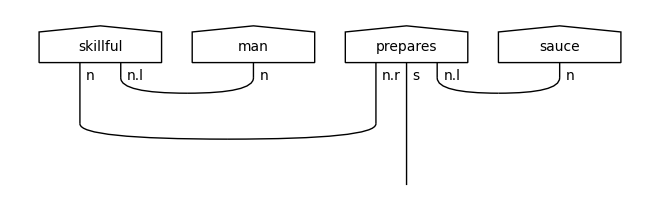

After removing cups


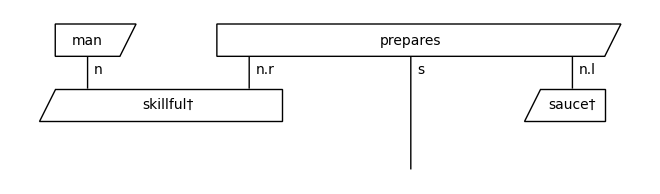

In [9]:
from lambeq import RemoveCupsRewriter

remove_cups = RemoveCupsRewriter()
print("Before removing cups")
raw_train_diagrams[0].draw()

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

print("After removing cups")
train_diagrams[0].draw()

In [6]:
# ansatz = IQPAnsatz({
#     AtomicType.NOUN: 1,
#     AtomicType.SENTENCE: 1,
#     AtomicType.PUNCTUATION: 1,  # Add this if your diagrams include verbs
#     AtomicType.PREPOSITIONAL_PHRASE: 1,  # Add this if your diagrams include adjectives
#     AtomicType.NOUN_PHRASE: 1,
#     AtomicType.CONJUNCTION: 1
# }, n_layers=1, n_single_qubit_params=3)

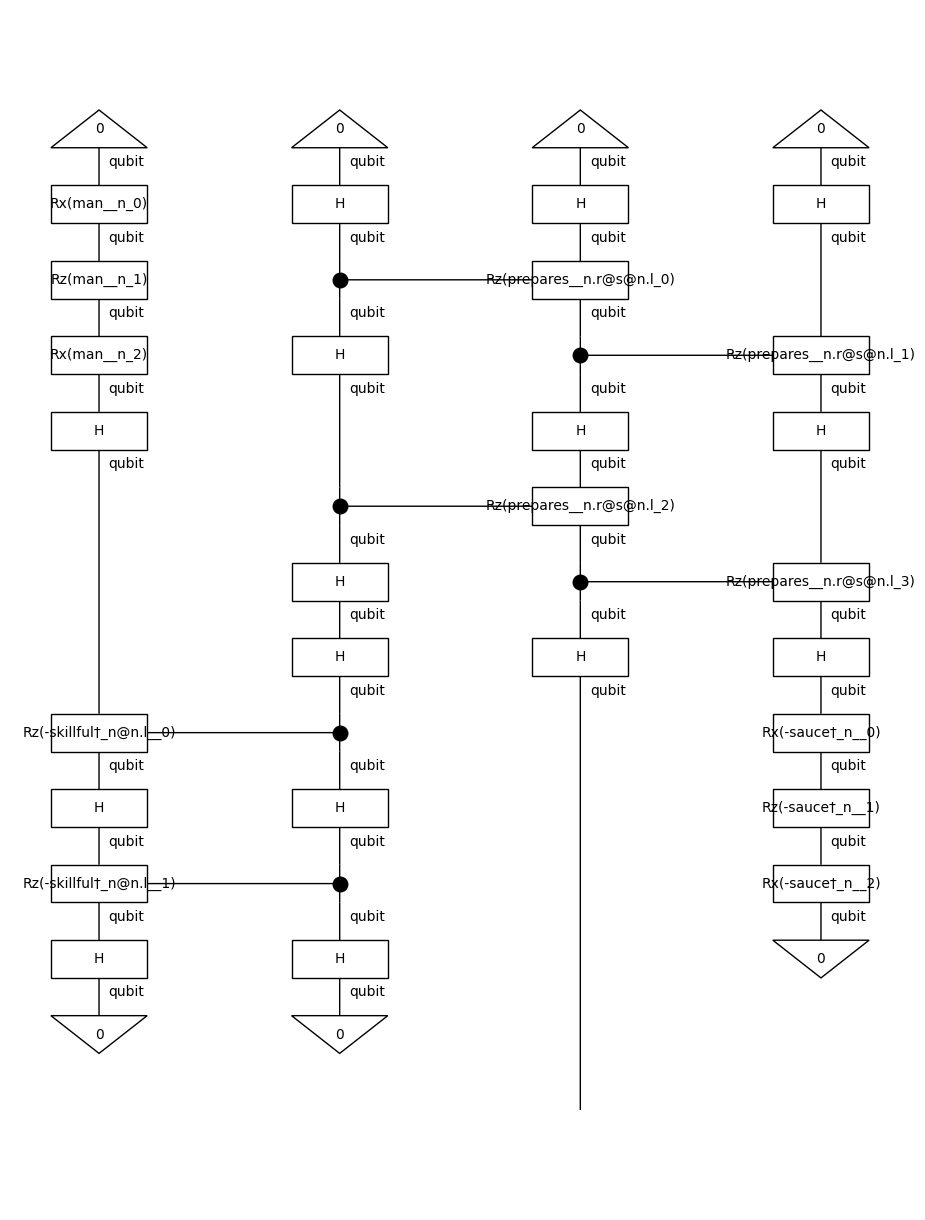

In [27]:
from lambeq import AtomicType, IQPAnsatz, MPSAnsatz, Sim14Ansatz, Sim15Ansatz, SpiderAnsatz, StronglyEntanglingAnsatz, Symbol, TensorAnsatz
from lambeq.backend.tensor import Dim

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
                   n_layers=2, n_single_qubit_params=3)
# ansatz = StronglyEntanglingAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1}, n_layers=2, n_single_qubit_params=3)
# ansatz = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
#                    n_layers=2, n_single_qubit_params=3)
# ansatz = Sim15Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},
#                    n_layers=2, n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 12))

# Step 5: Choosing a backend
We are now going to choose a backend on which our quantum circuits is going to be run. In this workshop we are going to use a classical simulator (a classical computer which simulates the bahaviour of a real quantum computer) to run our circuits. 

In [28]:
from pytket.extensions.qiskit import AerBackend
from lambeq import NumpyModel, PennyLaneModel, PytorchModel, TketModel

all_circuits = train_circuits+dev_circuits+test_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

# Step 6: Creating the quantum sentence classifier. 

The code below trains our quantum sentence classifier. Since the training can take a few minutes we could alternatively work with a pre-trained model which you can load from the `checkpoint.pickle` file.

In [29]:
from lambeq import BinaryCrossEntropyLoss

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)
# model = NumpyModel.from_diagrams(all_circuits, use_jit=True)

# loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss
loss = BinaryCrossEntropyLoss()
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting

from lambeq import QuantumTrainer, SPSAOptimizer

EPOCHS = 120
BATCH_SIZE = 30

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

In [23]:
trainer.fit(train_dataset, val_dataset, log_interval=1)

Epoch 1:    train/loss: 0.5020   valid/loss: 0.5980   train/acc: 0.5857   valid/acc: 0.7000
Epoch 2:    train/loss: 1.0450   valid/loss: 0.7074   train/acc: 0.6786   valid/acc: 0.6000
Epoch 3:    train/loss: 1.6167   valid/loss: 1.1953   train/acc: 0.4286   valid/acc: 0.7333
Epoch 4:    train/loss: 0.8300   valid/loss: 0.5415   train/acc: 0.7071   valid/acc: 0.7667
Epoch 5:    train/loss: 0.9348   valid/loss: 0.9899   train/acc: 0.6000   valid/acc: 0.4000
Epoch 6:    train/loss: 1.0423   valid/loss: 1.4303   train/acc: 0.5071   valid/acc: 0.4333
Epoch 7:    train/loss: 0.8103   valid/loss: 1.4960   train/acc: 0.5643   valid/acc: 0.5333
Epoch 8:    train/loss: 1.2294   valid/loss: 1.5238   train/acc: 0.5429   valid/acc: 0.5167
Epoch 9:    train/loss: 1.8899   valid/loss: 1.8383   train/acc: 0.5714   valid/acc: 0.4667
Epoch 10:   train/loss: 0.9229   valid/loss: 0.7655   train/acc: 0.5071   valid/acc: 0.6167
Epoch 11:   train/loss: 2.6834   valid/loss: 1.5154   train/acc: 0.3714   valid/

In [36]:
model = TketModel.from_checkpoint('models/classifier-IQP-no-cups.pickle', backend_config=backend_config)

# model.save("models/classifier-IQP-with-test.pickle")
# model.save("models/classifier-StronglyEntangling-with-test.pickle")
# model.save("models/classifier-Spider.pickle")
# model.save("models/classifier-Sim14-no-cups.pickle")
# model.save("models/classifier-Sim15-no-cups.pickle")

In [40]:
def measure_score(model):
        test_pred = model.get_diagram_output(test_circuits).tolist()
        total = 0
        for i in range(len(test_pred)):
            if test_pred[i][0]>=0.5:
                test_pred[i][0],test_pred[i][1]=1.0,0.0
            else:
                test_pred[i][0],test_pred[i][1]=0.0,1.0
            if test_pred[i][0]==test_labels[i][0] and test_pred[i][1]==test_labels[i][1]:
                total+=1
        return total/len(test_labels)

measure_score(model)

0.8

## Circuit-based Ansatz Experiment Results

### IQP-Ansatz
- No cups accuracy: 0.7333333333333333
    - Including test_circuits: 0.7333333333333333
- With cups accuracy: 0.5
- Sentence rewrite: 0.9666666666666667
### StronglyEntangling-Ansatz
- No cups accuracy: 0.7666666666666667
    - Including test_circuits: 0.7666666666666667
- With cups accuracy: 0.6
- Sentence rewrite: 0.8333333333333334
### Sim14-Ansatz
- No cups accuracy: 0.0.7333333333333333
- With cups accuracy: 0.5666666666666667
- Sentence rewrite: 0.7666666666666667
### Sim15-Ansatz
- No cups accuracy: 0.6666666666666666
- With cups accuracy: 0.6
- Sentence rewrite: 1.0

# Step 7: It's finally time for sentence generation!


We are now ready to implement an algorithm that generates a sentence about cooking. This will be achieved by searching through the space of all possible sentences in order to find and output a sentence about cooking. 

As discussed in the presentation the task above is called an optimisation problem. There are many different search strategies that can be employed to solve this task. Here we will employ the simplest possible strategy: Random guessing. 

Before we implement the random guessing algorithm we describe two helper functions. The details of how these are implemented are not important, but their input output behaviour is:

1. The `_create_sentence_searc_space()` function takes in no inputs and returns a list of all the sentences in our search space. 
2. The `_measure_quantum_circuit_for_sentence(sentence)` function takes in a sentence in the search space and measures the corresponding paraemterised quantum circuit, returning an array of two numbers between 0 and 1, which add up to 1. The first number represents the probability that the given sentence is about food, while the second number represents the probability that it is about IT.

In [15]:
from nltk import CFG
from nltk.parse.generate import generate

vocabulary = ['debugs', 'dinner', 'person', 'useful', 'runs', 'program', 'bakes', 'cooks', 'skillful', 'woman', 'prepares', 'application', 'man', 'software', 'sauce', 'meal', 'tasty']

subjects = ["man", "woman", "person"]
objects = ["sauce", "meal", "application", "software", "dinner", "program"]

def filter_sentence(sentence):
        # Make sure no word appears more than once:
        if not len(set(sentence)) == len(sentence):
            return False

        # Make sure subject appears before object:
        try:
            subject_position = next(i for i,v in enumerate(sentence) if v in subjects)
            object_position = next(i for i,v in enumerate(sentence) if v in objects)
        except:
            return False
        return subject_position < object_position

def _create_sentence_search_space():
    MC_GRAMMAR = """
      S -> NP VP
      NP -> N
      VP -> V NP
      NP -> A N
      A -> 'skillful' | 'tasty' | 'useful'
      N -> 'application' | 'dinner' | 'man' | 'meal' | 'person' | 'program' | 'sauce' | 'software' | 'woman'
      V -> 'bakes' | 'cooks' | 'debugs' | 'prepares' | 'runs'
      """

    GRAMMAR = CFG.fromstring(MC_GRAMMAR)
    SENTENCES = list(generate(GRAMMAR))

    SENTENCES = list(filter(filter_sentence, SENTENCES))
    return SENTENCES

def _measure_quantum_circuit_for_sentence(sentence):
    parser = BobcatParser(verbose='suppress')
    diagram = parser.sentences2diagrams([sentence])
    circ = [ansatz(remove_cups(d)) for d in diagram]

    return model.get_diagram_output(circ)[0]

### Generation assignment: Complete the  randomly_generate_sentence_with_topic function below. It's behaviour should be to continously guess a random sentence from the search space and then check to see if this is with high probability a sentence about the correct topic. If such a sentence is found, it should be returned. 

In [16]:
import random

sentences = _create_sentence_search_space()

def randomly_generate_sentence_with_topic(topic):
    i = 0
    while i < 100:
        i += 1
        print(i)
        sentence = " ".join(random.choice(sentences))
        print(sentence)
        prediction = _measure_quantum_circuit_for_sentence(sentence)
        print(prediction)
        if topic == "Food" and prediction[0] > 0.9:
            return i, sentence
            break
        elif topic == "IT" and prediction[1] > 0.9:
            return i, sentence
            break
    return 100, "Max iterations reached"

In [17]:
sentences[:10]

[['man', 'bakes', 'application'],
 ['man', 'bakes', 'dinner'],
 ['man', 'bakes', 'meal'],
 ['man', 'bakes', 'program'],
 ['man', 'bakes', 'sauce'],
 ['man', 'bakes', 'software'],
 ['man', 'bakes', 'skillful', 'application'],
 ['man', 'bakes', 'skillful', 'dinner'],
 ['man', 'bakes', 'skillful', 'meal'],
 ['man', 'bakes', 'skillful', 'program']]

Let's now run the function to generate a sentence about food

In [18]:
randomly_generate_sentence_with_topic("Food")

1
tasty person prepares useful meal
[0.80208333 0.19791667]
2
tasty woman debugs useful program
[0. 1.]
3
man prepares skillful sauce
[0.54411765 0.45588235]
4
skillful person runs tasty meal
[0.01276596 0.98723404]
5
useful person prepares program
[0.25 0.75]
6
useful person bakes software
[0.98449612 0.01550388]


(6, 'useful person bakes software')

# Bonus Question! (Difficult)
Of course, random guessing is not the most efficient way of navigating through the search space of sentences! 
In fact we already saw a cleverer way of performing this task in the presentation. This method was based on the well known hill climbing algorithm: https://en.wikipedia.org/wiki/Hill_climbing
Your task is to read about hill climbing and use your newfound knowledge to implement the sentence generation algorithm we covered in the presentation. 

In [19]:
def insert_word(sentence, vocabulary, test=False):
    """Inserts a random word from the vocabulary into a random position in the sentence."""
    sentence = sentence.split()
    position = random.randint(0, len(sentence))
    word = random.choice(vocabulary)
    new_sentence = sentence[:position] + [word] + sentence[position:]
    if test is True:
        return new_sentence
    elif filter_sentence(new_sentence):
        return new_sentence
    return sentence

def delete_word(sentence, test=False):
    sentence = sentence.split()
    if len(sentence) > 1:
        position = random.randint(0, len(sentence) - 1)
        new_sentence = sentence[:position] + sentence[position+1:]
        if test is True:
            return new_sentence
        elif filter_sentence(new_sentence):
            return new_sentence
    return sentence

def replace_word(sentence, vocabulary, test=False):
    """Replaces a word in the sentence with a random word from the vocabulary."""
    sentence = sentence.split()
    if len(sentence) > 0:
        position = random.randint(0, len(sentence) - 1)
        word = random.choice(vocabulary)
        new_sentence = sentence[:position] + [word] + sentence[position+1:]
        if test is True:
            return new_sentence
        elif filter_sentence(new_sentence):
            return new_sentence
    return sentence

# Generate a random sentence
random_sentence = " ".join(random.choice(sentences))

print("Original sentence: ", random_sentence)

modified_sentence = insert_word(random_sentence, vocabulary, test=True)
print("Insert word:", modified_sentence)

modified_sentence = delete_word(random_sentence, test=True)
print("Delete word:", modified_sentence)

modified_sentence = replace_word(random_sentence, vocabulary, test=True)
print("Replace word:", modified_sentence)

Original sentence:  tasty woman cooks dinner
Insert word: ['tasty', 'woman', 'meal', 'cooks', 'dinner']
Delete word: ['tasty', 'woman', 'dinner']
Replace word: ['tasty', 'tasty', 'cooks', 'dinner']


In [20]:
import math

def measure_score(sentence, topic):
    i=0
    score_sum=0
    while i<10:
        # print(i)
        new_score = _measure_quantum_circuit_for_sentence(sentence)
        if topic=="Food":
            score_sum += new_score[0]
        elif topic=="IT":
            score_sum += new_score[1]
        i+=1
    return score_sum/i

def simulated_annealing(current_sentence, topic, T=100, threshold=0.9):
    current_score = measure_score(current_sentence, topic)
    t=0
    print(current_score)
    print(current_sentence)
    
    while current_score <= threshold:    
        # Choose a random modification operation
        operation = random.choice([insert_word, delete_word, replace_word])
        new_sentence = " ".join(operation(current_sentence, vocabulary))
        # print(new_sentence)
        
        if new_sentence == current_sentence:
            continue
        try:
            new_score = measure_score(new_sentence, topic)
        except:
            # print("not within search space")
            continue
        
        # fast simulated annealing
        if new_score > current_score or random.random() < math.exp((new_score - current_score) / T):
            current_sentence = new_sentence
            current_score = new_score
        
        # Cool down
        T /= (t+1)
        t += 1
        print(current_score)
        print(current_sentence)
    
    return current_sentence

In [21]:
simulated_annealing(random_sentence, "IT")

0.4964705024558215
tasty woman cooks dinner
0.5104735809966189
woman cooks dinner
0.9993833667871999
woman dinner


'woman dinner'